In [36]:
# -*- coding: utf-8 -*-
"""
Created on Tue Dec 15 16:00:11 2020

@author: endi_
"""

#imports
import os
import pandas as pd
import numpy as np
import time 
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt

#plot a confusion matrix
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar(fraction=0.05)
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#takes an array of numbers and if it is over 0.5, 1 is added, else 0 i added to at list 
#which is returned 
def zero_one_encode(pred):
    pred_zero_one = []
    for num in pred:
        if num >= 0.5:
            pred_zero_one.append(1)
        else:
            pred_zero_one.append(0)

    return pred_zero_one
#load the dataset
path = "."

filename_read = os.path.join(path, "heart.csv")
df = pd.read_csv(filename_read)
df - df.reindex(np.random.permutation(df.index))

#columns to plot on the confusion matrix
df.columns = ['age', 'sex',	'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope',	'ca', 'thal', 'target']
cols = ['no heart disease', 'has heart disease']

#Encode the feature values which are strings to integers
for label in df.columns:
    df[label] = LabelEncoder().fit(df[label]).transform(df[label])

# Create our X and y data    
result = []
for x in df.columns:
    if x != 'target':
        result.append(x)

X = df[result].values
#standardizing the data by removing mean and scaling to unit variance
X = StandardScaler().fit_transform(X)
y = df['target'].values




In [48]:
from tensorflow.keras.layers import Dense, Dropout

test_accuracy_sum = 0
train_accuracy_sum = 0
test_accuracies = []
train_accuracies = []

time0 = time.time()

#number of different times to run the model and get the test accuracy
num_test = 20
for i in range(num_test):
    #shuffling and splitting the dataset 80-20 train-test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2)
    #initializing the model 
    model = Sequential()
    #adding the layers 
    model.add(Dense(30, input_shape=X[1].shape, activation='relu'))
    model.add(Dropout(0.4))
    #output layer
    model.add(Dense(1, activation='sigmoid')) 
    #setting the loss function
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    #fitting the model to the training dataset
    model.fit(X_train,y_train,verbose=0,epochs=40)
    
    
    #producing the predicted for training sample
    pred = model.predict(X_train)
    
    #encoding to predicted output to 0 or 1
    pred_zero_one= zero_one_encode(pred)
    
    #the train accuracy
    score = metrics.accuracy_score(y_train, pred_zero_one)
    train_accuracies.append(score)
    train_accuracy_sum += score    
    print("Accuracy score (train): {}".format(score))
    

    #doing the same as above for the test set
    pred = model.predict(X_test)
    pred_zero_one = zero_one_encode(pred)
    score = metrics.accuracy_score(y_test, pred_zero_one)
    test_accuracies.append(score)
    test_accuracy_sum += score
    print("Accuracy score: {}".format(score))

    
print("Time elapsed in seconds:" + str(time.time() - time0))
print("Average Training Accuracy over " + str(num_test) + " tests:" + str(train_accuracy_sum/num_test))
print("Average Testing Accuracy over " + str(num_test) + " tests:" + str(test_accuracy_sum/num_test))





Accuracy score (train): 0.8636363636363636
Accuracy score: 0.8524590163934426
Accuracy score (train): 0.8760330578512396
Accuracy score: 0.819672131147541
Accuracy score (train): 0.8677685950413223
Accuracy score: 0.8360655737704918
Accuracy score (train): 0.8347107438016529
Accuracy score: 0.9508196721311475
Accuracy score (train): 0.8677685950413223
Accuracy score: 0.8360655737704918
Accuracy score (train): 0.8512396694214877
Accuracy score: 0.8524590163934426
Accuracy score (train): 0.8677685950413223
Accuracy score: 0.7868852459016393
Accuracy score (train): 0.8842975206611571
Accuracy score: 0.8360655737704918
Accuracy score (train): 0.8636363636363636
Accuracy score: 0.7540983606557377
Accuracy score (train): 0.8677685950413223
Accuracy score: 0.9016393442622951
Accuracy score (train): 0.8677685950413223
Accuracy score: 0.819672131147541
Accuracy score (train): 0.8512396694214877
Accuracy score: 0.8032786885245902
Accuracy score (train): 0.8842975206611571
Accuracy score: 0.81967

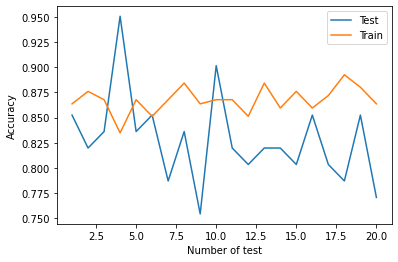

In [50]:
nums = np.arange(1,num_test + 1, 1)
plt.plot(nums, test_accuracies)
plt.plot(nums, train_accuracies)
plt.legend(["Test", "Train"])
plt.xlabel("Number of test")
plt.ylabel("Accuracy")
plt.show()

Confusion matrix, without normalization
[[24  5]
 [ 7 25]]
Normalized confusion matrix
[[0.83 0.17]
 [0.22 0.78]]


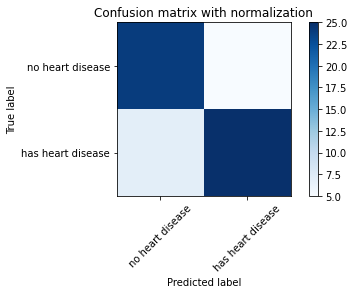

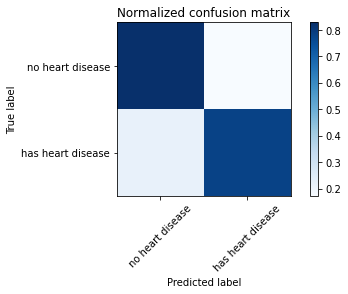

In [38]:
cm = confusion_matrix(y_test, pred_zero_one)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, cols, title='Confusion matrix with normalization')

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, cols, title='Normalized confusion matrix')
plt.show()